In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Análise de dados

In [10]:
df = pd.read_csv("data/crop_yield_data.csv")
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

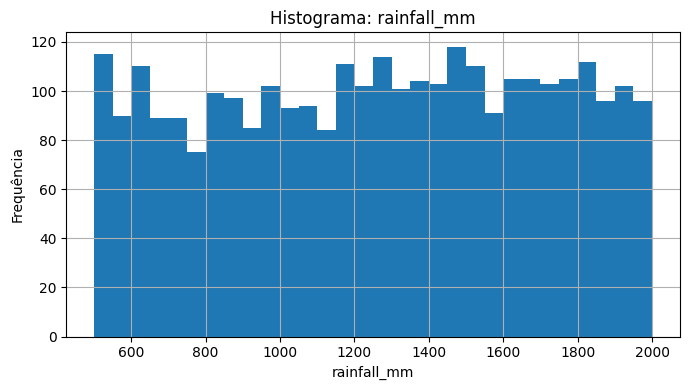

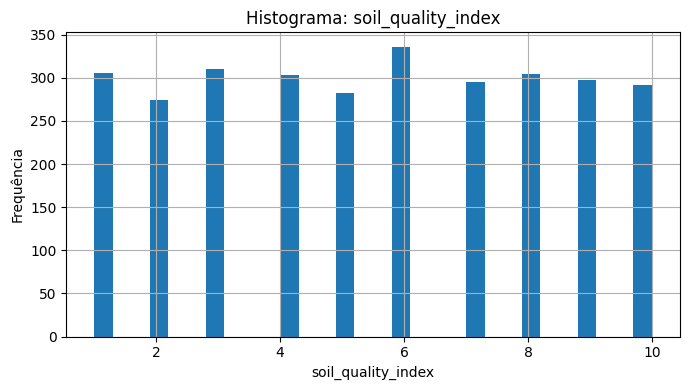

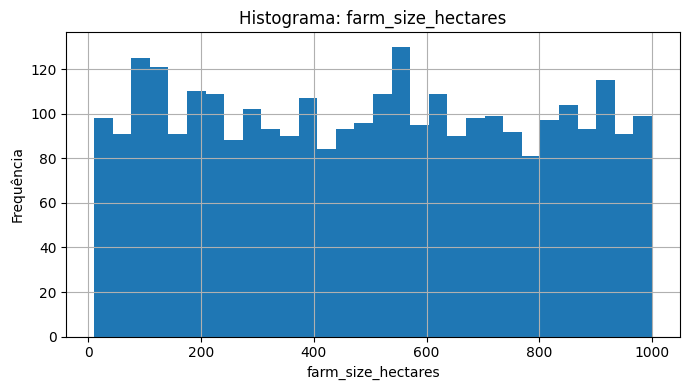

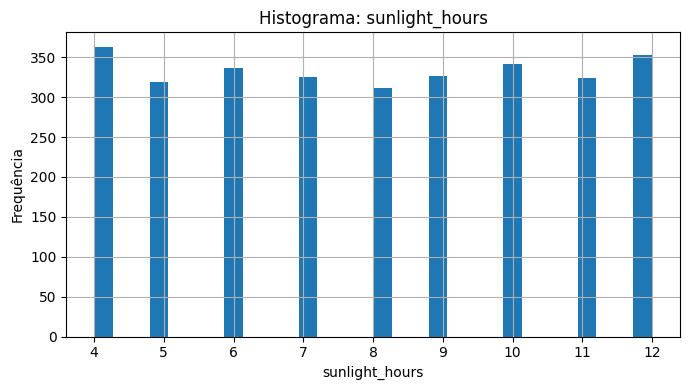

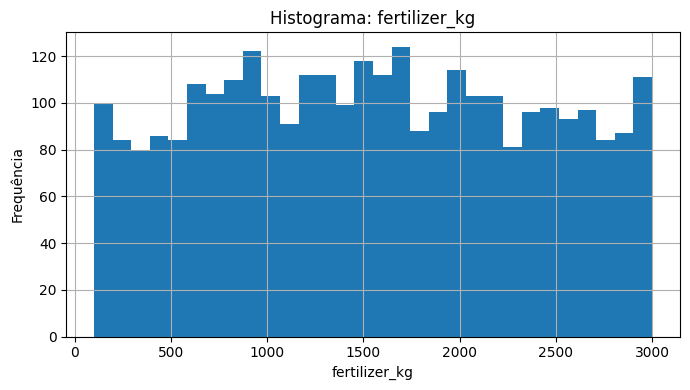

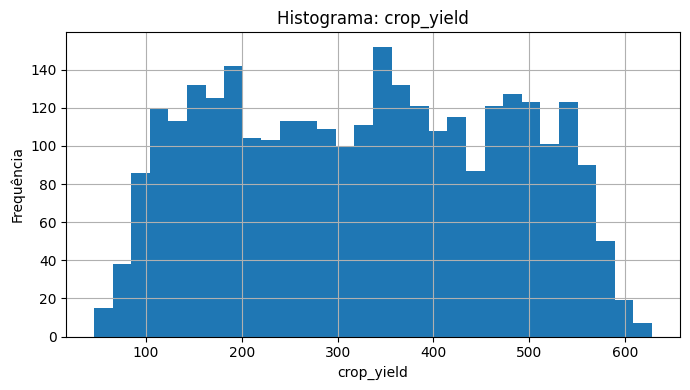

In [6]:
plt.close('all')

if num_cols:
    for col in num_cols[:10]:
        plt.figure(figsize=(7, 4))
        df[col].dropna().hist(bins=30)  # histograma simples
        plt.title(f"Histograma: {col}")
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.tight_layout()
        plt.show()

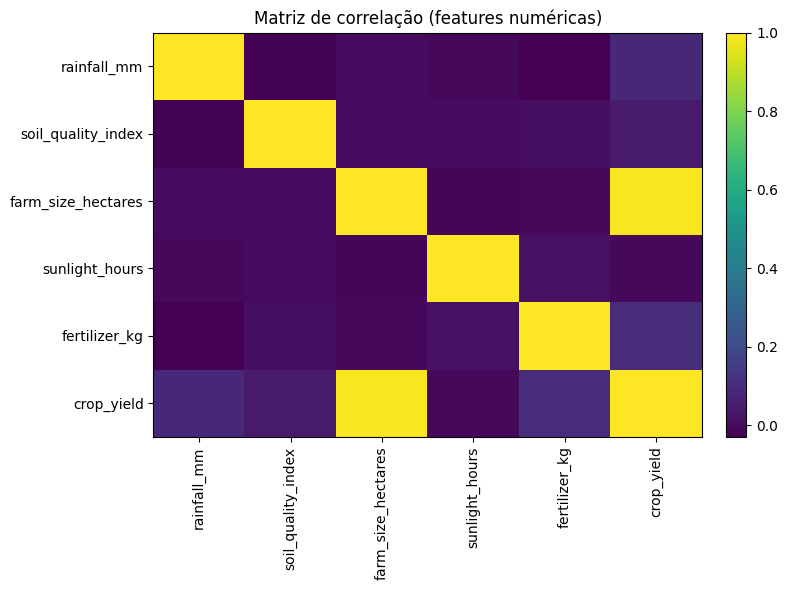

In [9]:
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de correlação (features numéricas)")
plt.tight_layout()
plt.show()

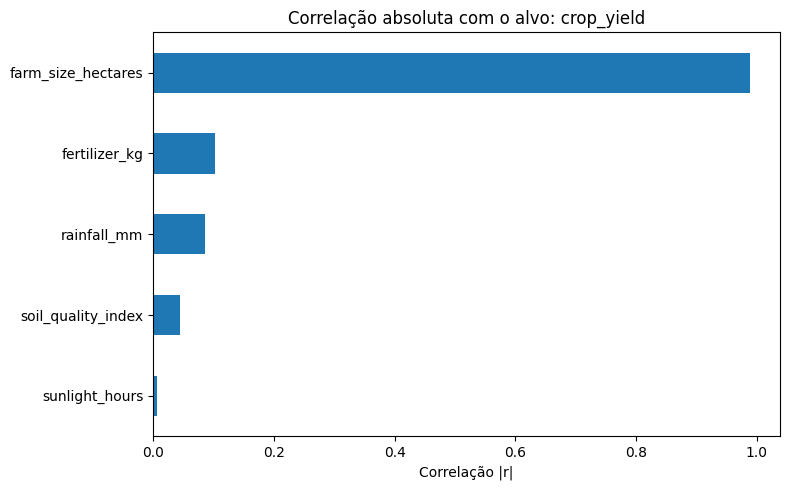

In [11]:
target_col = "crop_yield"
if target_col and num_cols:
    feats = [c for c in num_cols if c != target_col]
    if feats:
        # correlação absoluta com o alvo
        corrs = df[feats + [target_col]].corr()[target_col] \
                    .drop(labels=[target_col]) \
                    .abs() \
                    .sort_values(ascending=False)

        top_k = corrs.head(min(15, len(corrs)))

        plt.figure(figsize=(8, 5))
        top_k[::-1].plot(kind='barh')  # barras horizontais (do menor para o maior)
        plt.title(f"Correlação absoluta com o alvo: {target_col}")
        plt.xlabel("Correlação |r|")
        plt.tight_layout()
        plt.show()

# Treinamento do Modelo
Escolha do melhor modelo

In [13]:
X = df.drop(['crop_yield', 'soil_quality_index'], axis=1)
y = df[target_col]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ARDRegression, BayesianRidge, LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=5)
model_svr = SVR()
model_ard = ARDRegression()
model_bayesian = BayesianRidge()

models = [model, model_knn, model_svr, model_ard, model_bayesian]

best_model = None
best_mse = float('inf')

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_model = model
        best_mse = mse
    print(f"Model: {model.__class__.__name__}, MSE: {mse}")

print(f"\nBest model: {best_model.__class__.__name__}, MSE: {best_mse}")

Model: LinearRegression, MSE: 32.7529612747635
Model: KNeighborsRegressor, MSE: 298.48833333333334
Model: SVR, MSE: 5220.3495291516165
Model: ARDRegression, MSE: 32.769013914570415
Model: BayesianRidge, MSE: 32.75455399457733

Best model: LinearRegression, MSE: 32.7529612747635


# Avaliação do Modelo

In [45]:
best_model.score(X_test, y_test)

0.9984705432939068